# Imports


In [68]:
import numpy as np
import pandas as pd
import math 
import random
import matplotlib.pyplot as plt

# Setting up the variables

In [69]:
class Anneal:
    def __init__(self, data_link, initial_temp):
        #self.data = np.array([])
        #self.length = 0
        self.goal = 1000
        self.objective = 0
        self.weight = 0
        self.loop_size = 40000
        self.max_changes = 4000
        self.temp = initial_temp
        self.sucessful_changes = 10
        self.annealed_changes = 0
        self.looped = 0
        self.load(data_link)

# Defining functions for annealing

In [70]:
class Anneal(Anneal):    
    
    # returns the penalty for being overweight
    def penalty(self):
        return max(0, ((self.data[:,[2]]*self.data[:,[1]]).sum(axis = 0)[0] - 500)*20)
    
    # returns the CURRENT OBJECTIVE FUNCTION does not modify the objective variable in case 
    # a change needs to be reverted
    def get_objective(self):
        return self.goal - (self.data[:,[2]]*self.data[:,[0]]).sum(axis = 0)[0] + self.penalty()
    
    # returns the current weight of the array
    def get_weight(self):
        return (self.data[:,[2]]*self.data[:,[1]]).sum(axis = 0)[0]
    
    # inverts the included/not-included binary string to change and revert changes
    def invert(self,index):
        self.data[index, 2] = abs(self.data[index, 2]-1) 
        
    # returns true if a dice roll is less than the change/temp probability function    
    def prob_accept(self):
        cumulative = math.exp(-(abs(self.objective - self.get_objective()))/self.temp)
        return random.uniform(0,1) <= cumulative


# Defining data imports

In [71]:
class Anneal(Anneal):
    
    # loads the data set and calls the randomizer function
    def load(self, link_name):
        self.data = np.loadtxt(link_name)
        self.length = self.data.shape[0]
        
        # adding the bit-string that indicates if an item is included or not
        self.data = np.append(self.data,np.repeat(0, self.length).reshape(self.length, 1), axis = 1)
        self.initialize()
    
    # randomly assigns 1 to approximate 1/20th of the items 0.05
    def initialize(self):
   
        for i in range(self.length):
            if(random.uniform(0,1) <= 0.05):
                self.data[i, 2] = 1
                
        self.objective = self.get_objective()
        self.weight = (self.data[:,[2]]*self.data[:,[1]]).sum(axis = 0)[0]

        

# Defining the Annealing Process

In [72]:
class Anneal(Anneal):    
    def anneal(self):
        # initializing the counters used for epoch evaluations
        
        self.sucessful_changes = 0
        self.annealed_changes = 0
        self.looped = 0 
        
        for loop in range(self.loop_size):
            
            # this var is only used to track what percent of worse moves are accepted 'aka' annealed
            self.looped += 1
            
            # randomly select an item to change status, change the status and note the temporary new objective fn
            index_changed = random.randrange(0, self.length)
            self.invert(index_changed)
            temp_objective = self.get_objective()
            
            # if objective is less auto accept and break the loop if the stopping critera are met
            if(temp_objective < self.objective):
                self.objective = temp_objective
                self.sucessful_changes += 1

                if(self.sucessful_changes == self.max_changes):
                    break
            
                # if temp objective not less but probability allows change, accept the change and break if stopping
                # criteria is met
            elif(self.prob_accept()):
                self.objective = temp_objective
                self.annealed_changes += 1
                self.sucessful_changes +=1

                if(self.sucessful_changes == self.max_changes):
                    break
                # if neither of the critera are true just revert the change
            else:
                self.invert(index_changed)



# Using a loop to control the annealing process

In [107]:
# create an instance of the annealing function with the input and temp specified
forge = Anneal('Program2Input.txt', 4000)

# create a dataframe to record epoch stats
stats1 = pd.DataFrame(columns = ['temp', 'objective', 'weight', 'percent_annealed'])

# loop through, calling the anneal function, recording epoch results, and adjusting temp till no changes were made
# in the 40000 loops
while(forge.sucessful_changes != 0):
    forge.anneal()
    stats1 = pd.concat([stats1, pd.DataFrame({'temp': [forge.temp], 'objective': [forge.objective], 'weight': [(forge.data[:,[2]]*forge.data[:,[1]]).sum(axis = 0)[0]], 'percent_annealed':\
                                             (forge.annealed_changes/(forge.looped - (forge.sucessful_changes - forge.annealed_changes)))})], ignore_index = True)
    
    
    # attempt 1 geometric cooling with .9
    #forge.temp = forge.temp*0.9
    
    # attempt 2 geometric cooling with .85
    #forge.temp = forge.temp*0.85
    
    # attempt 3 linear cooling drop by 100 degrees till 100 then 10 degrees, then 1, then at one
    # drop by .01 till .5, at point 5 switch to .9 geometric
    
    if(forge.temp > 100):
        forge.temp -= 100
    elif(forge.temp > 10):
        forge.temp -= 10
    elif(forge.temp > 1):
        forge.temp -= 1
    elif(forge.temp >0.5):
        forge.temp -= 0.01
    else:
        forge.temp *= .9
    
    

    
output1 = pd.DataFrame(forge.data, columns = ['objective', 'weight', 'included'])
print(forge.objective)
print(forge.get_weight())

# DONT UNCOMMENT UNLESS YOU CREATE NEW OUTPUT FILES
'''
output1.to_csv('ouput3.txt')
stats1.to_csv('stats3.txt')
'''






















































































































276.70000000000005
499.9


"\noutput1.to_csv('ouput3.txt')\nstats1.to_csv('stats3.txt')\n"

In [76]:
print(output1)

     objective  weight  included
0          4.5     5.1       1.0
1          6.4    14.9       0.0
2          3.2     1.1       1.0
3          9.1     3.9       1.0
4          8.3    10.2       0.0
..         ...     ...       ...
395        5.6     4.0       1.0
396        2.2     6.7       0.0
397        6.7     9.8       0.0
398       10.0    16.6       0.0
399        1.3     1.0       1.0

[400 rows x 3 columns]


# Importing all of my saved stats fileS

In [77]:
st1 = pd.read_csv('stats1.txt', index_col = [0])
st2 = pd.read_csv('stats2.txt', index_col = [0])
st3 = pd.read_csv('stats3.txt', index_col = [0])

# Plotting the geometric with 0.9

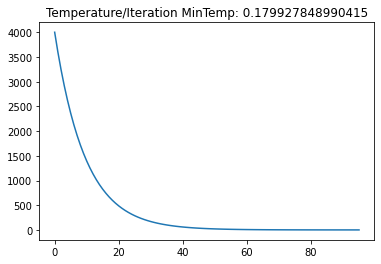

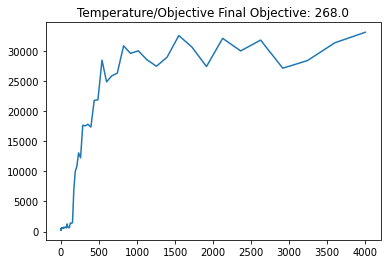

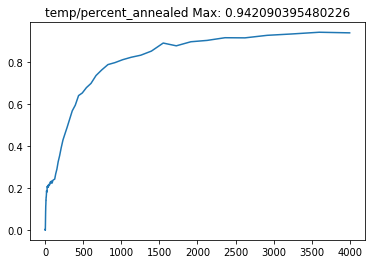

In [103]:
plt.plot(st1['temp'])
plt.title("Temperature/Iteration MinTemp: {}".format(min(st1['temp'])))
plt.show()
plt.plot(st1['temp'],st1['objective'])
plt.title("Temperature/Objective Final Objective: {}".format(st1.loc[st1.shape[0]-1,['objective']][0]))
plt.show()
plt.plot(st1['temp'],st1['percent_annealed'])
plt.title("temp/percent_annealed Max: {}".format(max(st1['percent_annealed'])))
plt.show()

# Plots for Geometric of 0.85

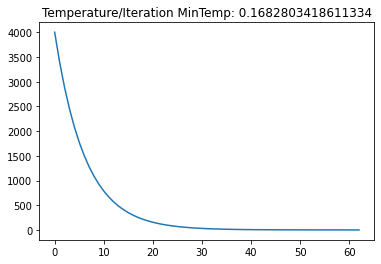

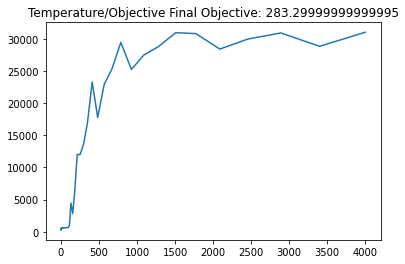

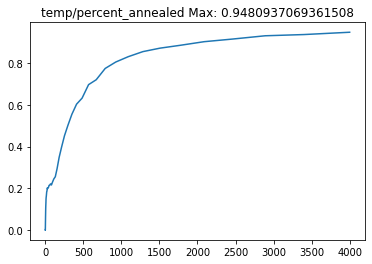

In [104]:
plt.plot(st2['temp'])
plt.title("Temperature/Iteration MinTemp: {}".format(min(st2['temp'])))
plt.show()
plt.plot(st2['temp'],st2['objective'])
plt.title("Temperature/Objective Final Objective: {}".format(st2.loc[st2.shape[0]-1,['objective']][0]))
plt.show()
plt.plot(st2['temp'],st2['percent_annealed'])
plt.title("temp/percent_annealed Max: {}".format(max(st2['percent_annealed'])))
plt.show()

# Plots for modified linear

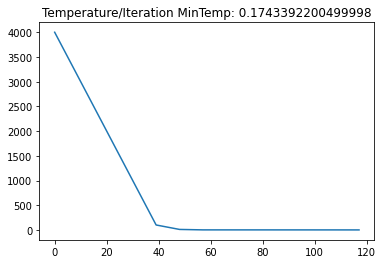

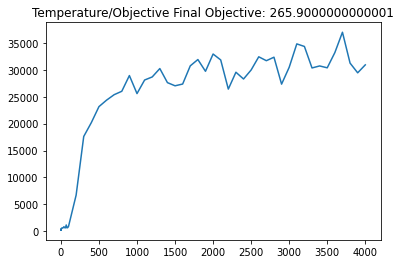

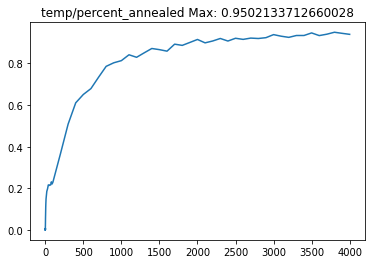

In [105]:
plt.plot(st3['temp'])
plt.title("Temperature/Iteration MinTemp: {}".format(min(st3['temp'])))
plt.show()
plt.plot(st3['temp'],st3['objective'])
plt.title("Temperature/Objective Final Objective: {}".format(st3.loc[st3.shape[0]-1,['objective']][0]))
plt.show()
plt.plot(st3['temp'],st3['percent_annealed'])
plt.title("temp/percent_annealed Max: {}".format(max(st3['percent_annealed'])))
plt.show()